<a href="https://colab.research.google.com/github/Tahimi/numericalMethods/blob/main/rangeKuttaMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import inspect
def my_solve_ivp(problem, ivpAlg):
  # naming this solver
  algName = inspect.stack()[0][3]

  # Reading the problem's data
  probName = problem['name']
  f = problem['f']
  xL = problem['xL']
  xR = problem['xR']
  yL = problem['yL']
  h = problem['h']

  # calling the algorithm, (Euler, Range Kutta,...)
  X, Y = ivpAlg(f, xL, yL, h, n = round((xR - xL)/h))

  print(algName, 'is done solving', probName)
  return X, Y

In [ ]:
def rk4_step(f, x, y, h):
  k1 = h*f(x, y)
  k2 = h*f(x + h/2., y + k1/2.)
  k3 = h*f(x + h/2., y + k2/2.)
  k4 = h*f(x + h, y + k3)
  return (k1 + 2*k2 + 2*k3 + k4)/6.

In [ ]:
def rk5_step(f, x, y, h):
  k1 = h * f(x, y)
  k2 = h * f(x + h/4, y + k1/4)
  k3 = h * f(x + 3*h/8, y + 3*k1/32 + 9*k2/32)
  k4 = h * f(x + 12*h/13, y + 1932*k1/2197 - 7200*k2/2197 + 7296*k3/2197)
  k5 = h * f(x + h, y + 439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104)
  k6 = h * f(x + h/2, y - 8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40)
  return 25*k1/216 + 1408*k3/2565 + 2197*k4/4104 - k5/5

In [ ]:
def rk4(f, xL, yL, h, n):
  x = xL
  y = yL

  # Variables Saving
  X = [x]
  Y = [y]

  for i in range(n):
    # Variables Updating
    y += rk4_step(f, x, y, h)
    x += h

    # Variables Saving
    X += [x]
    Y += [y]

  return X, Y

In [ ]:
def rk5(f, xL, yL, h, n):
  x = xL
  y = yL

  # Variables Saving
  X = [x]
  Y = [y]

  for i in range(n):
    k1 = h * f(x, y)
    k2 = h * f(x + h/4, y + k1/4)
    k3 = h * f(x + 3*h/8, y + 3*k1/32 + 9*k2/32)
    k4 = h * f(x + 12*h/13, y + 1932*k1/2197 - 7200*k2/2197 + 7296*k3/2197)
    k5 = h * f(x + h, y + 439*k1/216 - 8*k2 + 3680*k3/513 - 845*k4/4104)
    k6 = h * f(x + h/2, y - 8*k1/27 + 2*k2 - 3544*k3/2565 + 1859*k4/4104 - 11*k5/40)

    # Variables Updating
    y = y + 25*k1/216 + 1408*k3/2565 + 2197*k4/4104 - k5/5
    x = x + h

    # Variables Saving
    X += [x]
    Y += [y]

  return X, Y

In [ ]:
import numpy as np
import math

problem1 = {'name':'problem1',
            'f': lambda x, y: -y + np.sin(x),
            'xL': 0,
            'xR': 10,
            'yL': 0,
            'h': 1}
print(problem1)

{'name': 'problem1', 'f': <function <lambda> at 0x7faaaf4c8ee0>, 'xL': 0, 'xR': 10, 'yL': 0, 'h': 1}


In [ ]:
# find the analytic solution using symbolic solver
import sympy as sp

# Define symbols
x = sp.symbols('x')
y = sp.Function('y')(x)

# Define function f(x, y)
f = -y + sp.sin(x)

# Find symbolic solution
solution = sp.dsolve(sp.Eq(y.diff(x), f))

# Print general solution
print('solution.rhs = ', solution.rhs)

# Find particular solution for y(0) = yL
C1 = sp.symbols('C1')
xL = problem1['xL']
yL = problem1['xL']
particular_solution = solution.subs({C1: sp.solve(solution.rhs.subs(x, xL) - yL)[0]})
#print('sp.solve(solution.rhs.subs(x, 0) - 2) = ', sp.solve(solution.rhs.subs(x, 0) - 2))

# Print particular solution
print('particular_solution.rhs = ', particular_solution.rhs)

# Turn particular solution into a lambda function
y_lambda = sp.lambdify(x, particular_solution.rhs)

# Evaluate the lambda function at x = 1
print('y_lambda(1) = ', y_lambda(1))

solution.rhs =  C1*exp(-x) + sin(x)/2 - cos(x)/2
particular_solution.rhs =  sin(x)/2 - cos(x)/2 + exp(-x)/2
y_lambda(1) =  0.33452406005559954


In [ ]:
# insert the analytic solution into the problem description
problem1['fa'] = y_lambda
print(problem1)

# Evaluate the lambda function at x = 1
fa = problem1['fa']
print('fa(1) = ', fa(1))

{'name': 'problem1', 'f': <function <lambda> at 0x7faaaf4c8ee0>, 'xL': 0, 'xR': 10, 'yL': 0, 'h': 1, 'fa': <function _lambdifygenerated at 0x7faa85ba0820>}
fa(1) =  0.33452406005559954


In [ ]:
# select the problem and solve it
problem = problem1
X, Yrk4 = my_solve_ivp(problem, rk4)
_, Yrk5 = my_solve_ivp(problem, rk5)

my_solve_ivp is done solving problem1
my_solve_ivp is done solving problem1


In [ ]:
# solve the same problem using scipy IVP solver
from scipy.integrate import solve_ivp

# obs. one uses large values for tolerances to force the algorithm to use
# the largest step allowed, whci is set to be h; this way we get a constant
# step size allowing a fair comparaison with other methods (finite diferences
# for example). Otherwise, the scipy algorithm uses a variable step size,
# sine this is the default behaviour for all scipy IVP solvers.
sol = solve_ivp(fun = problem['f'],
                t_span = [problem['xL'], problem['xR']],
                y0 = [yL],
                t_eval = X,
                method = "RK45",
                max_step = problem['h'],
                atol = 1e90,
                rtol = 1e90)
Y_scipy = sol.y[0]
print('Y_scipy = ', Y_scipy)

Y_scipy =  [ 0.          0.33477444  0.73052269  0.59033811 -0.04261543 -0.61797733
 -0.61839227 -0.04776236  0.56770007  0.66156056  0.14734567]


In [ ]:
# computing the analytic solution vector
Ya = [problem['fa'](float(x)) for x in X]

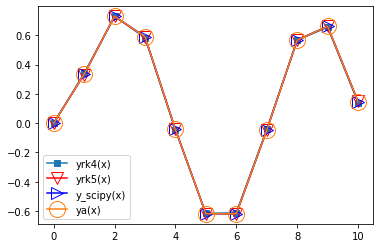

In [ ]:
# plot the results for comparaison
import matplotlib.pyplot as plt

plt.plot(X, Yrk4, marker='s', label='yrk4(x)')
plt.plot(X, Yrk5, color='r', marker='v', markersize=12, markerfacecolor='None', label='yrk5(x)')
plt.plot(X, Y_scipy, color='b', linestyle='-', marker='>', markersize=12, markerfacecolor='None', label='y_scipy(x)')
plt.plot(X, Ya, marker='o', markersize=16, markerfacecolor='None', label='ya(x)')
plt.legend(loc='best')
plt.show()

In [ ]:
# implementing Range Kutta 45, (of 5th order with adaptive step size)
import numpy as np
def rk45(f, xL, xR, yL, tol=1e-9, h_min=-np.inf, h_max=np.inf):
  x = xL
  y = yL

  # Variables saving
  X = [x]
  Y = [y]

  # initialize the step size
  h = (xR - xL)/10.

  i = 0
  while x < xR:
    i += 1
    # compute the rk4 and rk5 estimates for the next y
    y4 = y + rk4_step(f, x, y, h)
    y5 = y + rk5_step(f, x, y, h)

    # Calculate the error estimate
    err = abs(y5 - y4)/h

    # Variables updating and saving, (conditional)
    if err < tol:
      y = y5
      x += h

      X += [x]
      Y += [y]

    # step size updating, (within the allowed range)
    # there are 2 options
    h = updateStepSize1(h, err, tol, h_min, h_max)
    #h = updateStepSize2(h, err, tol, h_min, h_max)

  return X, Y

def updateStepSize1(h, err, tol, h_min, h_max):
  delta = 0.84*(tol/err)**0.25
  if delta <= 0.1:
    h = 0.1*h
  elif delta >= 4:
      h = 4*h
  else:
      h = delta*h
  h = max(h, h_min)
  h = min(h, h_max)
  return h

def updateStepSize2(h, err, tol, h_min, h_max):
  h = h*0.9*(tol/err)**0.2
  h = max(h, h_min)
  h = min(h, h_max)
  return h

In [ ]:
import inspect
def my_solve_ivp2(problem, method):
  # naming this solver
  algName = inspect.stack()[0][3]

  # Reading the problem's data
  probName = problem['name']
  f = problem['f']
  xL = problem['xL']
  xR = problem['xR']
  yL = problem['yL']
  h = problem['h']

  # calling the algorithm, (Euler, Range Kutta,...)
  X, Y = rk45(f, xL, xR, yL)

  print(algName, 'is done solving', probName)
  return X, Y

In [ ]:
Xrk45, Yrk45 = my_solve_ivp2(problem, rk45)

my_solve_ivp2 is done solving problem1


In [ ]:
# solve the same problem using scipy IVP solver (with adaptive step size)
from scipy.integrate import solve_ivp

# obs. one uses large values for tolerances to force the algorithm to use
# the largest step allowed, whci is set to be h; this way we get a constant
# step size allowing a fair comparaison with other methods (finite diferences
# for example). Otherwise, the scipy algorithm uses a variable step size,
# sine this is the default behaviour for all scipy IVP solvers.
sol2 = solve_ivp(fun = problem['f'],
                 t_span = [problem['xL'], problem['xR']],
                 y0 = [yL],
                 dense_output = True,
                 method = "RK45")
X_scipy2 = np.linspace(problem['xL'], problem['xR'], 100)
Y_scipy2 = sol2.sol(X_scipy2)[0]
print('Y_scipy2.size = ', Y_scipy2.size)

Y_scipy2.size =  100


In [ ]:
# computing the analytic solution vector
YaRk45 = [problem['fa'](float(x)) for x in X_scipy2]
print('len(YaRk45) = ', len(YaRk45))

len(YaRk45) =  100


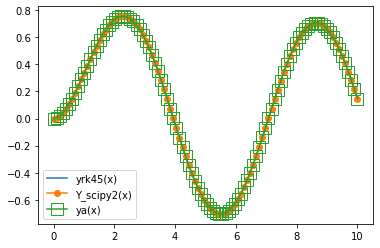

In [ ]:
# plot the results for comparaison
import matplotlib.pyplot as plt

plt.plot(Xrk45, Yrk45, label='yrk45(x)')
plt.plot(X_scipy2, Y_scipy2, marker='o', label='Y_scipy2(x)')
plt.plot(X_scipy2, YaRk45, marker='s', markersize=12, markerfacecolor='None', label='ya(x)')
plt.legend(loc='best')
plt.show()